In [1]:
from NNetwork.NNetwork import NNetwork
import numpy as np
import pandas as pd
import networkx as nx
import random
import seaborn as sns
from src.fca import FCA_nn, FCA_nx

In [95]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})


def display_graph_dyn(data = None, # [G, X_list]
                   title=None,
                   save_path=None,
                   grid_shape=[2,3],
                   fig_size=[10,10],
                   show_importance=False,
                   blinking_color=None,
                   coloring_offset=[-0.3, 0.3],
                   seed=0):

        # G = nn.NNetwork()
        # X_list = list of coloring on G (1xlen(G.nodes()) vectors)
        G, X_list = data
        nodes = G.nodes()
        edges = G.get_edges()
        n = len(nodes)
       
        rows = grid_shape[0]
        cols = grid_shape[1]

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        outer_grid = gridspec.GridSpec(nrows=rows, ncols=cols, wspace=0.2, hspace=0.02)

        # get nx graph and position for plot
        G1 = nx.Graph()
        for e in edges:
            G1.add_edge(e[0],e[1], color='b', weight=1)
        colors = [G1[u][v]['color'] for u,v in edges]
        G2 = nx.Graph()
        G2.add_nodes_from(G1)

        pos = nx.spring_layout(G1, seed=seed)
        #for labeling outside the node
        #offset =1
        pos_labels = {}
        keys = pos.keys()
        y_list = []
        for key in keys:
            x, y = pos[key]
            y_list.append(y)
        offset = np.std(np.asarray(y_list))
        
        for key in keys:
            x, y = pos[key]
            pos_labels.update({key: (x+offset*coloring_offset[0], y+offset*offset*coloring_offset[1])})
                
        # make nested gridspecs
        
        for i in range(rows * cols):
            a = i // cols
            b = i % rows
            
            # display graphs
            inner_grid = outer_grid[i].subgridspec(1, 1, wspace=0.05, hspace=0.05)
            
            # add transition arrows
            ax = plt.Subplot(fig, inner_grid[0, 0])
            #ax.set_ylabel(r'$\rightarrow$', color='r')
            #ax.set_ylabel('-->', color='r')
            ax.yaxis.set_label_position('right')
            if i < len(X_list)-1:
                ax.set_ylabel(r"$\rightarrow$", rotation=0, labelpad=10)
            else:
                ax.set_ylabel(r"$\cdots$", rotation=0, labelpad=10)
            #ax.axis('off')
            # make xaxis invisibel
            ax.xaxis.set_visible(False)
            # make spines (the box) invisible
            plt.setp(ax.spines.values(), visible=False)
            # remove ticks and labels for the left axis
            ax.tick_params(left=False, labelleft=False)
            #remove background patch (only needed for non-white background)
            ax.patch.set_visible(False)
            fig.add_subplot(ax)

            # make dictionary of node colors 
            coloring_dict = {}
            X = X_list[i]
            for c in np.arange(n):
                node = nodes[c]
                coloring_dict.update({node: int(X[c])})
                
            
            
            node_color_map = []
            for c in np.arange(n):
                node = nodes[c]
                node_color = 'black'
                if blinking_color is not None:
                    if X[c] == blinking_color:
                        node_color = 'yellow'
                    elif X[c] > blinking_color: # post-blinking color
                        node_color = 'gray'

                node_color_map.append(node_color)
            
            # read in as a nx graph for plotting
            ax = fig.add_subplot(inner_grid[0, 0])
            
            
            edges_nx = G1.edges()
            weights = [1*G1[u][v]['weight'] for u,v in edges_nx]
            
            nx.draw(G1, pos=pos, nodelist=nodes, with_labels=False, node_size=50, ax=ax, 
                    width=weights, node_color=node_color_map, edge_color=colors);
            nx.draw(G1, pos=pos_labels, nodelist=nodes, with_labels=True, node_size=0,
                    ax=ax, labels=coloring_dict, width=0)
           
            ax.set_xticks([])
            ax.set_yticks([])
            
            
        if title is not None:
            plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        if save_path is not None:
            fig.savefig(save_path, bbox_inches='tight')

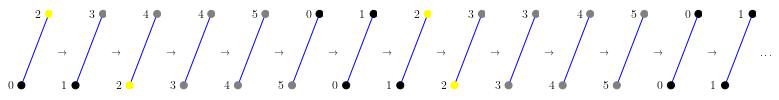

In [100]:
# a(0) --- b(2)
edgelist = [['a', 'b']]
G = NNetwork()
G.add_edges(edgelist)
k = 6
iteration = 13
ret = FCA_nn(G, s=[0, 2], k=k, iteration=iteration)

save_path = "figures/FCA_ex_1.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], fig_size=[13,1.5], 
                  blinking_color=2, save_path=save_path, coloring_offset=[-0.05,0],
                  seed=13)

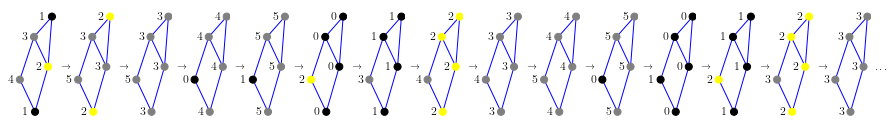

In [101]:
edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e']]
G = NNetwork()
G.add_edges(edgelist)
k = 6
iteration = 14
ret = FCA_nn(G, s=[1, 2, 3, 1, 4], k=k, iteration=iteration)

save_path = "figures/FCA_ex_2.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[15,2], blinking_color=2,
                  coloring_offset=[-0.7,0], save_path=save_path,
                  seed=4)

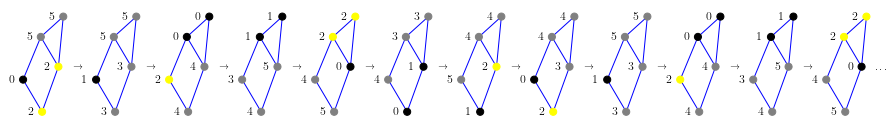

In [103]:
edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e']]
G = NNetwork()
G.add_edges(edgelist)
k = 6
iteration = 11

# find a non-synchronizing initial configuration 
for i in np.arange(100):
    s = list(np.random.randint(0, k, size=(len(G.nodes()),)))
    ret = FCA_nn(G, s=s, k=k, iteration=100)
    X_last = ret[-1]
    if np.std(X_last)>0:
        break 

ret = FCA_nn(G, s=[5, 2, 5, 2, 0], k=k, iteration=iteration)        

#ret = FCA_nn(G, s=s, k=k, iteration=iteration)        
save_path = "figures/FCA_ex_3.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[15,2], blinking_color=2,
                  coloring_offset=[-0.7,0], save_path=save_path,
                  seed=4)

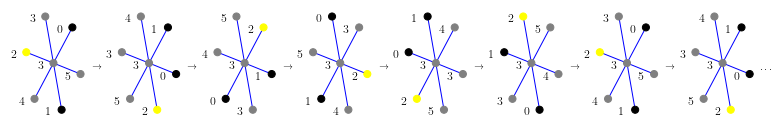

In [104]:
edgelist = [['0','1'], ['0', '2'], ['0','3'], ['0','4'], ['0','5'], ['0','6']]
#edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e'], ['a','f'], ['a', 'g']]
G = NNetwork()
G.add_edges(edgelist)
k = 6
iteration = 7
ret = FCA_nn(G, s=[3, 5, 1, 2, 4, 3, 0], k=k, iteration=iteration)

save_path = "figures/FCA_ex_4.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[13,2], blinking_color=2,
                  coloring_offset=[-0.7,-0.1], save_path = save_path,
                  seed=1)


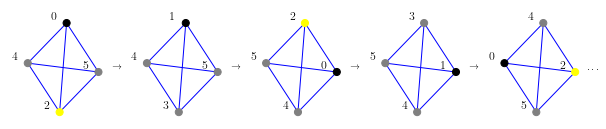

In [105]:
edgelist = [['0', '2'], ['0', '4'], ['0', '5'], ['2', '4'], ['2', '5'], ['5', '4']]
G = NNetwork()
G.add_edges(edgelist)
k = 6
iteration = 4
ret = FCA_nn(G, [0,2,4,5], k=k, iteration=iteration)

save_path = "figures/FCA_ex_5.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[10,2], blinking_color=2,
                  coloring_offset=[-0.5,0.3], save_path=save_path,
                  seed=3)

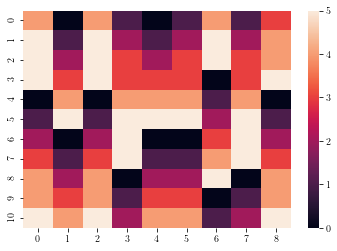

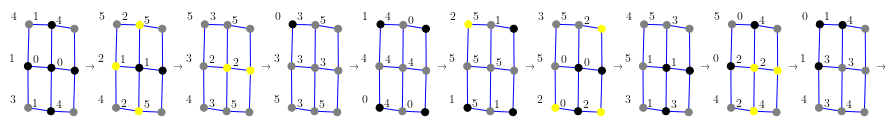

In [24]:
edgelist = [['a', 'b'], ['b', 'c'], ['d', 'e'], ['e', 'f'], ['g', 'h'], ['h', 'i'],
            ['a', 'd'], ['d', 'g'], ['b', 'e'], ['e', 'h'], ['c', 'f'], ['f', 'i']]
G = NNetwork()
G.add_edges(edgelist)
iteration=10
k = 6
S = list(np.random.randint(0, k-1, size=(9,)))
ret = FCA_nn(G, S, k=k, iteration=iteration)
df = pd.DataFrame(ret)
sns.heatmap(df)

save_path = "figures/FCA_ex_5"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration], 
                  fig_size=[15,2], blinking_color=2,
                  coloring_offset=[-0.8,0.3], save_path=save_path,
                  seed=0)

<AxesSubplot:>

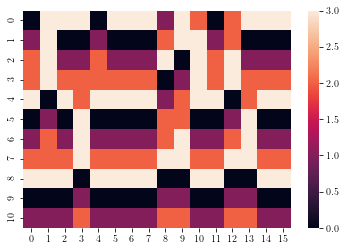

In [140]:
#generate a grid 2d graph with 400 nodes
G = nx.grid_2d_graph(4, 4)
G.edges()
new_nodes = {e: n for n, e in enumerate(G.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in G.edges]
edgelist = [] #update the formate of edgelist to match with NNetwork input
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = NNetwork()
G.add_edges(edgelist)

iteration=10
k = 4

S = list(np.random.randint(0, k, size=(len(G.nodes()),)))
ret = FCA_nn(G, S, k=k, iteration=iteration)
df = pd.DataFrame(ret)
sns.heatmap(df)

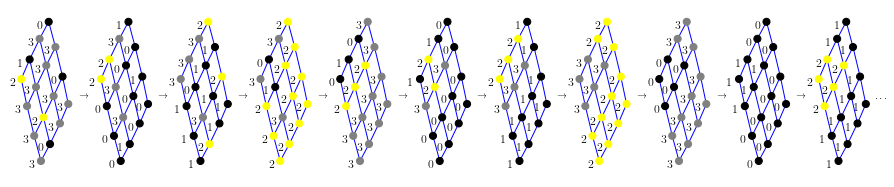

In [141]:
save_path = "figures/FCA_ex_6.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[15,3], blinking_color=2,
                  coloring_offset=[-0.7,-0.2], save_path=save_path,
                  seed=2)

<AxesSubplot:>

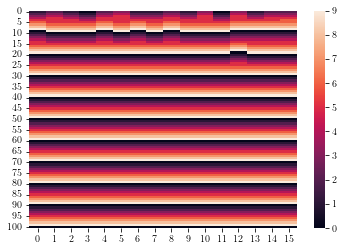

In [43]:
ret = FCA_nn(G, S, 10, 1, 1, 100)
df = pd.DataFrame(ret)
sns.heatmap(df)

In [ ]:
ret = FCA_nn(G, S, 10, 1, 0.2, 100)
df = pd.DataFrame(ret)
sns.heatmap(df)

<AxesSubplot:>

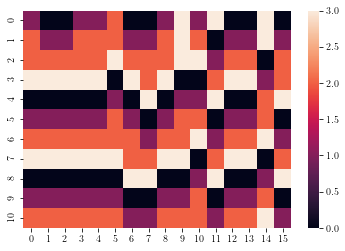

In [44]:
#generate a random tree
G0 = nx.grid_2d_graph(4, 4)
mst = nx.minimum_spanning_edges(G0, data=False)
edges = list(mst)
new_nodes = {e: n for n, e in enumerate(G0.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in edges]
edgelist = [] #update the formate of edgelist to match with NNetwork input
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = NNetwork()
G.add_edges(edgelist)

iteration=10
k = 4

S = list(np.random.randint(0, k, size=(len(G.nodes()),)))
ret = FCA_nn(G, S, k=k, iteration=iteration)
df = pd.DataFrame(ret)
sns.heatmap(df)

<AxesSubplot:>

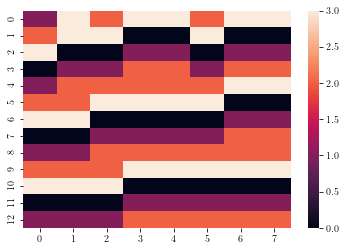

In [118]:
#generate a random tree
G = nx.random_tree(n=8, seed=1)
G.edges()
new_nodes = {e: n for n, e in enumerate(G.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in G.edges]
edgelist = [] #update the formate of edgelist to match with NNetwork input
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = NNetwork()
G.add_edges(edgelist)

iteration=12
k = 4

S = list(np.random.randint(0, k, size=(len(G.nodes()),)))
ret = FCA_nn(G, S, k=k, iteration=iteration)
df = pd.DataFrame(ret)
sns.heatmap(df)

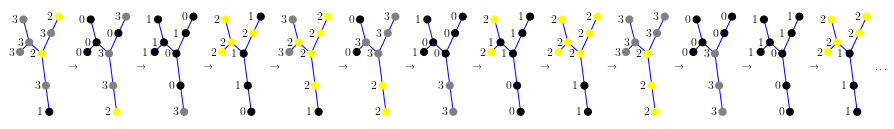

In [119]:
save_path = "figures/FCA_ex_7.pdf"
display_graph_dyn(data=[G, ret], grid_shape=[1,iteration+1], 
                  fig_size=[15,2], blinking_color=2,
                  coloring_offset=[-0.8, 0], save_path=save_path,
                  seed=2)